# Visualize Nodes Edges

Visualize Doc2Vec embeddings using the suggested cosine similarity threshold to draw them

In [250]:
# Packages
import pandas as pd
import os
from sklearn.metrics.pairwise import cosine_similarity
# Network stuff
import networkx as nx
from pyvis.network import Network

## Load and Average Data

In [251]:
# Load '../../../Data/Doc2Vec_Vectors/train_set_only_doc2vec_vectors.parquet'
train_set_only_doc2vec_vectors = pd.read_parquet('../../../Data/Doc2Vec_Vectors/train_set_only_doc2vec_vectors.parquet')
train_set_only_doc2vec_vectors

,ticker,fixed_quarter_date,train_test_80_20,doc2vec_0,doc2vec_1,doc2vec_2,doc2vec_3,doc2vec_4,doc2vec_5,doc2vec_6,...,doc2vec_590,doc2vec_591,doc2vec_592,doc2vec_593,doc2vec_594,doc2vec_595,doc2vec_596,doc2vec_597,doc2vec_598,doc2vec_599
0,NEE,2011-04-01,train,0.096152,0.012448,0.110792,0.370414,-0.007633,0.081182,-0.112105,...,-0.169105,0.257034,-0.371397,0.938060,0.115869,-0.849956,-0.878151,-0.191613,0.145275,-0.429365
2,NEE,2011-10-01,train,0.196652,0.066855,0.093877,0.338612,0.039583,0.026579,-0.073750,...,-0.200846,-0.007466,-0.419616,0.913265,0.005924,-1.044994,-0.702282,-0.302511,0.059584,-0.218079
3,NEE,2012-01-01,train,0.159998,0.044097,0.098191,0.394054,0.065712,0.098732,-0.093042,...,-0.223133,0.230341,-0.371785,0.712093,-0.239675,-0.897958,-0.782335,-0.200993,0.082307,-0.254543
4,NEE,2012-04-01,train,0.132308,0.077436,0.090016,0.350628,0.054360,0.056895,-0.087542,...,-0.185399,0.073718,-0.414363,0.716999,-0.175380,-0.648275,-0.656121,-0.198390,0.034506,-0.416061
5,NEE,2012-07-01,train,0.135046,0.037539,0.128558,0.336666,0.032631,0.098562,-0.126038,...,-0.082684,-0.057817,-0.401111,0.876193,-0.194184,-0.779764,-0.722556,-0.321357,-0.253594,-0.166601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,KOP,2015-01-01,train,0.171360,0.106424,0.135922,0.361613,0.043903,0.086705,-0.138036,...,-0.153944,0.535048,-0.844701,0.393990,-0.361283,-0.061412,-0.328803,-0.074976,-0.031894,-0.277902
912,KOP,2015-04-01,train,0.141399,0.089557,0.129467,0.318158,0.059236,0.051793,-0.094016,...,-0.493963,0.728956,-0.739571,0.647282,-0.103960,0.033775,-0.548875,-0.076420,-0.167214,-0.453214
914,KOP,2015-10-01,train,0.188014,0.053335,0.030327,0.304871,0.068235,0.136801,-0.103217,...,-0.401082,0.705631,-0.613554,0.318372,-0.308976,0.104408,-0.329960,-0.226888,0.093149,-0.347842
915,KOP,2016-01-01,train,0.205142,0.111981,0.132103,0.342970,0.047705,0.002264,-0.107936,...,-0.453407,0.634877,-0.687092,0.279048,-0.242548,0.084653,-0.522515,-0.350393,0.093046,0.013722


In [252]:
# Drop unneeded columns, group by ticker, average all other columns
lim_cols = train_set_only_doc2vec_vectors.drop(columns=['fixed_quarter_date', 'train_test_80_20'])
firm_doc2vec = lim_cols.groupby('ticker').mean().reset_index()
firm_doc2vec

,ticker,doc2vec_0,doc2vec_1,doc2vec_2,doc2vec_3,doc2vec_4,doc2vec_5,doc2vec_6,doc2vec_7,doc2vec_8,...,doc2vec_590,doc2vec_591,doc2vec_592,doc2vec_593,doc2vec_594,doc2vec_595,doc2vec_596,doc2vec_597,doc2vec_598,doc2vec_599
0,AAPL,0.159057,0.052179,0.109439,0.324668,0.043798,0.054615,-0.120265,0.075453,0.164953,...,-0.304335,0.627722,-0.079751,0.560086,-0.062746,-0.226480,-0.425949,0.066768,-0.165850,-0.086064
1,ABB,0.155648,0.057806,0.108995,0.351643,0.058928,0.068663,-0.110094,0.111351,0.149494,...,-0.326352,0.210306,-0.233041,0.646351,0.035639,-0.193451,-0.259547,-0.131939,-0.092759,-0.029047
2,ABBV,0.130992,0.061934,0.112742,0.349509,0.033739,0.071909,-0.088028,0.109011,0.126572,...,-1.134825,0.563907,-0.120729,0.232756,-0.112475,-0.269418,-0.580562,0.088437,-0.062485,-0.064648
3,ABC,0.149845,0.062290,0.101895,0.333251,0.021332,0.077360,-0.086929,0.073085,0.144227,...,-0.031757,0.021005,-0.334735,0.029826,0.168818,-0.362354,-0.463853,-0.068047,0.080483,-0.225382
4,ABG,0.124696,0.047824,0.094657,0.340173,0.033392,0.031527,-0.093100,0.056727,0.132370,...,-0.339411,0.168082,-0.592320,0.815916,-0.086282,-0.131672,-0.343626,-0.338615,0.153404,-0.048416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,XRX,0.186972,0.053065,0.127570,0.346262,0.038194,0.061342,-0.152160,0.081962,0.171843,...,-0.641557,0.356365,-0.329794,0.457770,0.440458,0.134245,-0.304387,-0.006405,0.003814,-0.073750
526,XYL,0.181473,0.157031,0.096858,0.369068,-0.034598,0.003069,-0.152513,0.094877,0.157918,...,-0.347859,0.242066,-0.689655,0.581142,-0.232239,-0.083146,-0.414809,-0.121200,-0.078148,-0.131032
527,YUM,0.148469,0.073339,0.112407,0.324551,0.037148,0.075365,-0.091852,0.093514,0.134723,...,-0.375696,0.153047,-0.606461,0.894578,-0.197127,-0.324416,-0.397587,-0.335787,-0.467180,-0.258404
528,ZBRA,0.166253,0.061926,0.108085,0.353161,0.064369,0.073836,-0.092048,0.113987,0.129753,...,-0.568223,0.658886,-0.138317,0.649544,-0.115161,-0.283412,-0.301141,-0.238352,-0.145644,-0.147920


## Compute All Pairwise Cosine Similarities

In [253]:
# Compute all pairwise cosine similarities
cs_vals = cosine_similarity(firm_doc2vec.drop(columns='ticker', inplace=False))
cs_df = pd.DataFrame(cs_vals, columns=firm_doc2vec['ticker'], index=firm_doc2vec['ticker'])
# Flatten index
cs_df = cs_df.stack()
# Rename index
cs_df.index.rename(['ticker1', 'ticker2'], inplace=True)
# Reset index
cs_df = cs_df.reset_index()
# Renaem column 0 to 'cosine_similarity'
cs_df.rename(columns={0: 'cosine_similarity'}, inplace=True)
# Drop duplicates on combinations of ticker1 and ticker2
cs_df = cs_df[cs_df['ticker1'] < cs_df['ticker2']]
cs_df

,ticker1,ticker2,cosine_similarity
1,AAPL,ABB,0.830134
2,AAPL,ABBV,0.788966
3,AAPL,ABC,0.832170
4,AAPL,ABG,0.881641
5,AAPL,ABT,0.817039
...,...,...,...
279308,XYL,ZBRA,0.899201
279309,XYL,ZTS,0.874898
279838,YUM,ZBRA,0.831971
279839,YUM,ZTS,0.846412


## Add Company Name and Sector

In [254]:
# Load rating datasets for company name

# Dataset 1
rating_data_1 = pd.read_csv(os.path.expanduser('~/Box/STAT 222 Capstone/Raw Data/Supplementary Credit Rating Data From Kaggle/corporateCreditRatingWithFinancialRatios.csv'))
print(rating_data_1.columns)
# Keep Ticker and Corporation, rename Ticker to ticker, Corporation to company
rating_data_1 = rating_data_1[['Ticker', 'Corporation']].rename(columns={'Ticker': 'ticker', 'Corporation': 'company'})
# Drop duplicates
rating_data_1.drop_duplicates(inplace=True)

# Dataset 2
rating_data_2 = pd.read_csv(os.path.expanduser('~/Box/STAT 222 Capstone/Raw Data/Credit Rating Data From Kaggle/corporate_rating.csv'))
print(rating_data_2.columns)
# Keep Symbol and Name, rename Symbol to ticker, Name to company
rating_data_2 = rating_data_2[['Symbol', 'Name']].rename(columns={'Symbol': 'ticker', 'Name': 'company'})
# Drop duplicates
rating_data_2.drop_duplicates(inplace=True)

# Stack the two datasets and take a random item for each duplicate on ticker
rating_data_names = pd.concat([rating_data_1, rating_data_2], axis=0)
rating_data_names.drop_duplicates(subset='ticker', keep='first', inplace=True)
rating_data_names


Index(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker', 'Current Ratio',
       'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share'],
      dtype='object')
Index(['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFl

,ticker,company
0,AWR,American States Water Co.
1,ADP,Automatic Data Processing Inc.
2,AVT,Avnet Inc.
3,CWT,California Water Service Co.
4,CAH,Cardinal Health Inc.
...,...,...
2019,IRS,IRSA Inversiones Y Representaciones S.A.
2020,IT,"Gartner, Inc."
2022,XPER,Xperi Holding Corporation
2023,IMO,Imperial Oil Limited


In [255]:
# Need to reload all data, just ticker and sector columns
# list of files in '../../../Data/All_Data/All_Data_Fixed_Quarter_Dates'
file_list = [f for f in os.listdir(r'../../../Data/All_Data/All_Data_Fixed_Quarter_Dates') if f.endswith('.parquet')]
# read in all parquet files
sector_df = pd.concat([pd.read_parquet(r'../../../Data/All_Data/All_Data_Fixed_Quarter_Dates/' + f, columns=['ticker', 'Sector']) for f in file_list]).drop_duplicates()
sector_df

,ticker,Sector
0,AAPL,Information Technology
10,ABB,Industrials
14,ABBV,Health Care
23,ABC,Health Care
46,ABG,Consumer Discretionary
...,...,...
773,XRAY,Health Care
795,XYL,Industrials
796,YUM,Consumer Discretionary
816,ZBRA,Information Technology


In [256]:
# Inner join rating_data_names and sector_df on ticker
rating_data_names_sector = rating_data_names.merge(sector_df, on='ticker', how='inner')
rating_data_names_sector

,ticker,company,Sector
0,AWR,American States Water Co.,Utilities
1,ADP,Automatic Data Processing Inc.,Information Technology
2,AVT,Avnet Inc.,Information Technology
3,CWT,California Water Service Co.,Utilities
4,CAH,Cardinal Health Inc.,Health Care
...,...,...,...
494,RFP,Resolute Forest Products Inc.,Materials
495,ALKS,Alkermes plc,Health Care
496,EA,Electronic Arts Inc.,Communication Services
497,MX,MagnaChip Semiconductor Corporation,Information Technology


In [257]:
# Left join on ticker1
cs_df_w_more = cs_df.merge(rating_data_names_sector, left_on='ticker1', right_on='ticker', how='left')
cs_df_w_more.drop(columns='ticker', inplace=True)
cs_df_w_more.rename(columns={'company': 'company1', 'Sector': 'Sector1'}, inplace=True)
# Left join on ticker2
cs_df_w_more = cs_df_w_more.merge(rating_data_names_sector, left_on='ticker2', right_on='ticker', how='left')
cs_df_w_more.drop(columns='ticker', inplace=True)
cs_df_w_more.rename(columns={'company': 'company2', 'Sector': 'Sector2'}, inplace=True)
# Put variable names containing 1 first, then 2, then cosine_similarity
cs_df_w_more = cs_df_w_more[['ticker1', 'company1', 'Sector1', 'ticker2', 'company2', 'Sector2', 'cosine_similarity']]
# Sort by cosine_similarity
cs_df_w_more.sort_values(by='cosine_similarity', ascending=False, inplace=True)
# Output to Excel
#cs_df_w_more.to_excel('../../../Output/Doc2Vec Network/all_data_firm_doc2vec_cosine_similarity.xlsx', index=False)
# Number of companies
print('number companies')
print(len(set(list(cs_df_w_more['ticker1'].unique()) + list(cs_df_w_more['ticker2'].unique()))))
cs_df_w_more

number companies
530


,ticker1,company1,Sector1,ticker2,company2,Sector2,cosine_similarity
137593,TDS,Telephone and Data Systems Inc.,Communication Services,USM,United States Cellular Corporation,Communication Services,0.995916
49022,CMI,Cummins Inc.,Industrials,MTOR,Meritor Inc.,Industrials,0.993173
98186,IMKTA,"Ingles Markets, Incorporated",Consumer Staples,SPH,Suburban Propane Partners L.P.,Utilities,0.986140
98081,IMKTA,"Ingles Markets, Incorporated",Consumer Staples,NEU,NewMarket Corporation,Materials,0.985651
120588,NEU,NewMarket Corporation,Materials,SPH,Suburban Propane Partners L.P.,Utilities,0.985521
...,...,...,...,...,...,...,...
14363,AMC,"AMC Entertainment Holdings, Inc.",Communication Services,TEVA,"Teva Pharmaceuticals USA, Inc.",Health Care,0.573646
14384,AMC,"AMC Entertainment Holdings, Inc.",Communication Services,TSLA,"Tesla, Inc.",Consumer Discretionary,0.571649
13429,AMAG,"AMAG Pharmaceuticals, Inc.",Health Care,AMC,"AMC Entertainment Holdings, Inc.",Communication Services,0.567631
14252,AMC,"AMC Entertainment Holdings, Inc.",Communication Services,NVS,Novartis AG,Health Care,0.554580


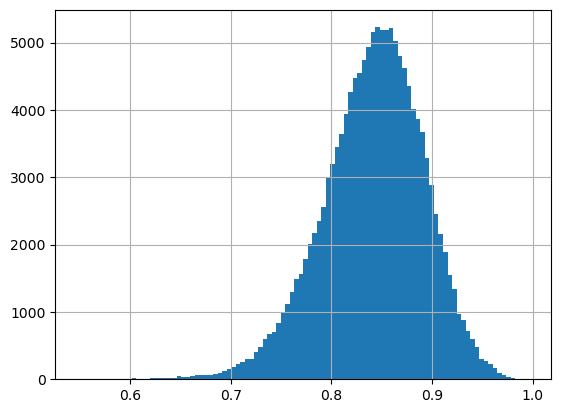

In [258]:
# Histogram of cosine similarities
cs_df_w_more['cosine_similarity'].hist(bins=100)

# Find 98th percentile (similar to rule in original paper)
quantile_98 = cs_df_w_more['cosine_similarity'].quantile(0.98)

## Limit connections

In [259]:
# Keep if cosine_similarity >= quantile_98
cs_df_w_more_98 = cs_df_w_more[cs_df_w_more['cosine_similarity'] >= quantile_98]
# Check number of companies
print('number companies')
print(len(set(list(cs_df_w_more_98['ticker1'].unique()) + list(cs_df_w_more_98['ticker2'].unique()))))
cs_df_w_more_98

number companies
314


,ticker1,company1,Sector1,ticker2,company2,Sector2,cosine_similarity
137593,TDS,Telephone and Data Systems Inc.,Communication Services,USM,United States Cellular Corporation,Communication Services,0.995916
49022,CMI,Cummins Inc.,Industrials,MTOR,Meritor Inc.,Industrials,0.993173
98186,IMKTA,"Ingles Markets, Incorporated",Consumer Staples,SPH,Suburban Propane Partners L.P.,Utilities,0.986140
98081,IMKTA,"Ingles Markets, Incorporated",Consumer Staples,NEU,NewMarket Corporation,Materials,0.985651
120588,NEU,NewMarket Corporation,Materials,SPH,Suburban Propane Partners L.P.,Utilities,0.985521
...,...,...,...,...,...,...,...
41365,CCLP,CSI Compressco LP,Energy,VMI,Valmont Industries Inc.,Industrials,0.934033
78197,FLEX,Flex Ltd.,Information Technology,MTOR,Meritor Inc.,Industrials,0.934026
47870,CLMT,Calumet Specialty Products Partners LP,Energy,SWX,NaN,NaN,0.934016
113820,MHO,"M/I Homes, Inc.",Consumer Discretionary,VMI,Valmont Industries Inc.,Industrials,0.934015


## Plotting

In [260]:
# Keep company1, company2, cosine_similarity
nw_cols = cs_df_w_more_98[['company1', 'company2', 'cosine_similarity']]
# Rename to 'Source', 'Target', 'Weight'
nw_cols.rename(columns={'company1': 'Source', 'company2': 'Target', 'cosine_similarity': 'weight'}, inplace=True)
# Where missing, fill company1 with ticker1 and company2 with ticker2
nw_cols['Source'].fillna(cs_df_w_more_98['ticker1'], inplace=True)
nw_cols['Target'].fillna(cs_df_w_more_98['ticker2'], inplace=True)
# Add column 'Type' with value 'Undirected'
nw_cols['Type'] = 'Undirected'
# Limit to just node cols
#nw_cols = nw_cols[['Source', 'Target']]
print(nw_cols)
# Load as graph
G = nx.from_pandas_edgelist(nw_cols, 
                            source='Source', 
                            target='Target', 
                            edge_attr='weight'
                            )

                                        Source  \
137593         Telephone and Data Systems Inc.   
49022                             Cummins Inc.   
98186             Ingles Markets, Incorporated   
98081             Ingles Markets, Incorporated   
120588                   NewMarket Corporation   
...                                        ...   
41365                        CSI Compressco LP   
78197                                Flex Ltd.   
47870   Calumet Specialty Products Partners LP   
113820                         M/I Homes, Inc.   
9054                                 AAR CORP.   

                                    Target    weight        Type  
137593  United States Cellular Corporation  0.995916  Undirected  
49022                         Meritor Inc.  0.993173  Undirected  
98186       Suburban Propane Partners L.P.  0.986140  Undirected  
98081                NewMarket Corporation  0.985651  Undirected  
120588      Suburban Propane Partners L.P.  0.985521  Undirected

C:\Users\ijyli\AppData\Local\Temp\ipykernel_22092\1130782776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nw_cols.rename(columns={'company1': 'Source', 'company2': 'Target', 'cosine_similarity': 'weight'}, inplace=True)
C:\Users\ijyli\AppData\Local\Temp\ipykernel_22092\1130782776.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nw_cols['Source'].fillna(cs_df_w_more_98['ticker1'], inplace=True)
C:\Users\ijyli\AppData\Local\Temp\ipykernel_22092\1130782776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [261]:
# Visualize in networkx
#nx.draw_networkx(G)

In [262]:
# Pyvis network
pvn = Network(notebook=True)
pvn.from_nx(G)
#pvn.toggle_physics(True) # turn off movement
# add physics controls
pvn.show_buttons(filter_=['physics'])
# use repulsion
pvn.repulsion(node_distance=100)
pvn.show('pvn.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
